# Ground Truth problems

These are problems for which the data generating process is a known model, 

$$ y = \phi^*(\mathbf{x}, \theta^*) $$

We assess how well symbolic regression algorithms find the form of the model, $\phi^*$, with some leniency on $\theta^*$ (we allow the model to be off by a constant or a scalar). 

In [1]:
import pandas as pd
import json
import numpy as np
from glob import glob
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('pdf', fonttype=42)
import os
sns.set(font_scale=1.2)
rdir = '../results/'
# figdir = 'figs/ground-truth/'
figdir = '../paper/figs/results_sym_data/'

print('figdir:',figdir)
def save(h=None,name='tmp'):
    name = name.strip().replace(' ','-').replace('%','pct')
    if h == None:
        h = plt.gcf()
    h.tight_layout()
    print('saving',name+'.pdf')
    if not os.path.exists(figdir):
        os.makedirs(figdir)
    plt.savefig(figdir+'/'+name+'.pdf', dpi=400, bbox_inches='tight')
    

figdir: ../paper/figs/results_sym_data/


# read data from feather

In [2]:
df_results = pd.read_feather(rdir+'ground-truth_results.feather')

# combine with local results ---------------------------------
df_results_local = pd.read_feather('../results/ground-truth_results_local.feather')
df_results = pd.concat([df_results_local, df_results], axis=0)

# removing feat (it was a sanity check)
# df_results = df_results.loc[df_results['algorithm']!='FEAT(e-lex)']

print('mean trial count:')
print(df_results.groupby('algorithm')['dataset'].count().sort_values()
      / df_results.dataset.nunique())

mean trial count:
algorithm
C-D-TS        2.138462
C-D-UCB1      4.753846
D-UCB1        5.792308
D-TS          5.800000
Baseline      5.800000
AIFeynman    35.915385
FEAT         36.169231
gplearn      37.523077
MRGP         37.838462
EPLEX        38.000000
AFP          38.000000
BSR          38.000000
GP-GOMEA     38.000000
FFX          38.000000
ITEA         38.000000
DSR          38.000000
SBP-GP       38.000000
AFP_FE       40.000000
Operon       40.000000
Name: dataset, dtype: float64


In [3]:
print(df_results["algorithm"].unique())
df_results[df_results["algorithm"]=="FEAT"]

['Baseline' 'C-D-UCB1' 'D-UCB1' 'D-TS' 'C-D-TS' 'FEAT' 'AFP' 'DSR' 'FFX'
 'GP-GOMEA' 'ITEA' 'Operon' 'AIFeynman' 'BSR' 'EPLEX' 'AFP_FE' 'gplearn'
 'MRGP' 'SBP-GP']


,dataset,algorithm,random_state,training time (s),symbolic_model,mse_train,mae_train,r2_train,mse_test,mae_test,...,symbolic_fraction,symbolic_error_is_zero,symbolic_error_is_constant,symbolic_fraction_is_constant,sympy_exception,training time (hr),r2_zero_test,data_group,symbolic_solution,process_time
0,feynman_III_10_19,FEAT,29910,7477.133516,16.4356+-9.06*(0.1340*(0.0948*x_0-0.4616*(0.03...,5.158905e-03,4.934706e-02,0.999902,4.657973e-03,4.577807e-02,...,(0.003*Bx*mom - 3.36*Bx + 0.069*By + 1.01*By*e...,False,False,False,None,2.076982,0.999911,Feynman,False,7472.385775
9,feynman_III_10_19,FEAT,23654,636.218597,16.3018+6.28*x_0+5.44*(0.8835*x_3+0.2564*x_1)+...,7.122876e+00,2.167380e+00,0.873671,4.012022e+00,1.710611e+00,...,(0.04303*Bx**2 + 0.27802*Bx*mom + 1.854*Bx + 0...,False,False,False,None,0.176727,0.924955,Feynman,False,635.630530
191,feynman_III_10_19,FEAT,14423,7576.555284,16.466+-13.74*(0.0375*x_0-0.8222*x_2)+10.10*(0...,1.545038e-03,2.661330e-02,0.999971,1.679500e-03,2.710005e-02,...,None,False,False,False,None,2.104599,0.999968,Feynman,False,7570.953067
192,feynman_III_10_19,FEAT,14423,7059.683217,16.4656+-6.52*(0.0144*exp(0.5034*(0.2403*x_1-0...,4.635524e-03,4.889632e-02,0.999913,4.473421e-03,4.674296e-02,...,(0.047*Bx*(0.83*By - 0.936*Bz)*(-0.e-3*Bx + 0....,False,False,False,None,1.961023,0.999914,Feynman,False,7056.197374
193,feynman_III_10_19,FEAT,14423,2549.147430,16.4629+4.38*(0.3638*x_1+1.0988*x_3)+-3.35*(0....,4.836700e-02,1.729812e-01,0.999097,1.619409e-02,9.277797e-02,...,(-0.003*Bx*Bz*(0.424*Bx - 0.1*mom) + 1.593*Bx ...,False,False,False,None,0.708097,0.999689,Feynman,False,2541.692349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68830,strogatz_vdp2,FEAT,5390,148.743288,-0.0494531+-0.09*x_0,2.062118e-17,3.499304e-09,1.000000,2.039534e-17,3.579783e-09,...,-10*(-0.09*x - 0.049)/x,False,False,False,None,0.041318,1.000000,Strogatz,False,148.680772
68831,strogatz_vdp2,FEAT,5390,178.787194,-0.0494504+-0.09*x_0,1.073537e-08,8.326731e-05,0.999999,1.766185e-10,1.225463e-05,...,-10*(-0.09*x - 0.049)/x,False,False,False,None,0.049663,1.000000,Strogatz,False,178.228066
68832,strogatz_vdp2,FEAT,860,183.814810,-0.050107+-0.09*x_0,1.912654e-17,3.424174e-09,1.000000,2.227791e-17,3.519332e-09,...,-10*(-0.09*x - 0.05)/x,False,False,False,None,0.051060,1.000000,Strogatz,False,183.729596
68833,strogatz_vdp2,FEAT,860,195.807367,-0.0501146+-0.09*x_0,9.843030e-09,7.901096e-05,0.999999,7.171177e-11,6.915918e-06,...,-10*(-0.09*x - 0.05)/x,False,False,False,None,0.054391,1.000000,Strogatz,False,194.623040


# compute symbolic solutions

In [4]:
df_results.loc[:,'symbolic_solution'] = df_results[['symbolic_error_is_zero',
                                                    'symbolic_error_is_constant',
                                                    'symbolic_fraction_is_constant']
                                                   ].apply(any,raw=True, axis=1)
print(df_results['algorithm'].unique())
display(df_results.sample(3).T)

# clean up any corner cases (constant models, failures)
df_results.loc[:,'symbolic_solution'] = df_results['symbolic_solution'] & ~df_results['simplified_symbolic_model'].isna() 
df_results.loc[:,'symbolic_solution'] = df_results['symbolic_solution'] & ~(df_results['simplified_symbolic_model'] == '0')
df_results.loc[:,'symbolic_solution'] = df_results['symbolic_solution'] & ~(df_results['simplified_symbolic_model'] == 'nan')

display(df_results.sample(3).T)
print(df_results['algorithm'].unique())

# save results for detailed tabulating
df_results.reset_index(drop=True).to_feather(rdir+'ground-truth_solns.feather')

['Baseline' 'C-D-UCB1' 'D-UCB1' 'D-TS' 'C-D-TS' 'FEAT' 'AFP' 'DSR' 'FFX'
 'GP-GOMEA' 'ITEA' 'Operon' 'AIFeynman' 'BSR' 'EPLEX' 'AFP_FE' 'gplearn'
 'MRGP' 'SBP-GP']


,28395,8147,39362
dataset,feynman_I_13_4,feynman_II_10_9,feynman_I_32_17
algorithm,GP-GOMEA,FEAT,AIFeynman
random_state,29910,4426,23654
training time (s),2707.345003,7845.161618,29023.125974
symbolic_model,-34.044888+-3.121649*((((((-14.219000-(x0*x1))...,0.328674+0.26*(0.1468*((0.1424*(0.3087*((0.967...,asin(-0.366408973917+(x3*sin(((((x5/x4))-x2))*...
mse_train,1.128516,0.000028,28.049359
mae_train,0.809458,0.003629,2.353317
r2_train,0.998347,0.999537,-0.309886
mse_test,0.864179,0.000028,28.077637
mae_test,0.680792,0.003654,2.305789


,699,34142,33170
dataset,feynman_III_12_43,feynman_I_25_13,feynman_I_18_4
algorithm,BSR,EPLEX,GP-GOMEA
random_state,5390,16850,14423
training time (s),28800.021179,8857.031323,2319.518205
symbolic_model,[0.08125612]+[-0.07683943]*-((x[1])^2)+[-0.005...,((x_0+(x_1/((sin((x_0/sqrt(|x_0|)))/(x_1*sin((...,-0.020780+0.033995*((sqrt(((sin((x3p/x1))+sin(...
mse_train,0.014662,0.020889,0.002261
mae_train,0.090165,0.115579,0.036101
r2_train,0.977546,0.96576,0.996836
mse_test,0.014382,0.000007,0.001342
mae_test,0.089536,0.002145,0.024259


['Baseline' 'C-D-UCB1' 'D-UCB1' 'D-TS' 'C-D-TS' 'FEAT' 'AFP' 'DSR' 'FFX'
 'GP-GOMEA' 'ITEA' 'Operon' 'AIFeynman' 'BSR' 'EPLEX' 'AFP_FE' 'gplearn'
 'MRGP' 'SBP-GP']


In [5]:
df_results["algorithm"].unique()

array(['Baseline', 'C-D-UCB1', 'D-UCB1', 'D-TS', 'C-D-TS', 'FEAT', 'AFP',
       'DSR', 'FFX', 'GP-GOMEA', 'ITEA', 'Operon', 'AIFeynman', 'BSR',
       'EPLEX', 'AFP_FE', 'gplearn', 'MRGP', 'SBP-GP'], dtype=object)

In [6]:
df_results["data_group"].unique()

array(['Feynman', 'Strogatz'], dtype=object)

## summarize results by dataset, including ranking

In [7]:
# print(df_results['algorithm'].unique())

# display(df_results.groupby(['dataset','target_noise'])['algorithm'].unique())
# display(df_results.groupby(['dataset','target_noise'])['algorithm'].nunique().reset_index().sample(10))

df_results2 = df_results.merge(df_results.groupby(['dataset','target_noise'])['algorithm'].nunique().reset_index(),
                              on=['dataset','target_noise'], suffixes=('','_count'))

# print(df_results2['algorithm'].unique())
# display(df_results2.sample(3).T)

# count repeat trials
df_results2 = df_results2.merge(
           df_results2.groupby(['algorithm','dataset','target_noise'])['random_state'].nunique().reset_index(),
           on=['algorithm','dataset','target_noise'],suffixes=('','_repeats'))

# print(df_results2['algorithm'].unique())
# display(df_results2.sample(3).T)

# accuracy-based exact solutions 
df_results2['accuracy_solution'] = df_results2['r2_test'].apply(lambda x: x > 0.999).astype(float)

# print(df_results2['algorithm'].unique())
# display(df_results2.sample(3).T)

# get mean solution rates for algs on datasets at specific noise levels, averaged over trials 
for soln in ['accuracy_solution','symbolic_solution']:
    df_results2 = df_results2.merge(
        df_results2.groupby(['algorithm','dataset','target_noise'])[soln].mean().reset_index(),
                                  on=['algorithm','dataset', 'target_noise'],suffixes=('','_rate'))

# print(df_results2['algorithm'].unique())
# display(df_results2.sample(3).T)

# # rankings
for col in [c for c in df_results2.columns if c.endswith('test') or c.endswith('size')]:
    ascending = 'r2' not in col
    df_results2[col+'_rank_per_trial']=df_results2.groupby(
                        ['dataset','target_noise','random_state'])[col].apply(
                                                                              lambda x: 
                                                                              round(x,3).rank(
                                                                              ascending=ascending).astype(int))

# print(df_results2['algorithm'].unique())
# display(df_results2.sample(3).T)

df_sum = df_results2.groupby(['algorithm','dataset','target_noise','data_group'],as_index=False).median()

# print(df_sum['algorithm'].unique())
# display(df_sum.sample(3).T)

# rankings and normalized scores per dataset
for col in [c for c in df_sum.columns if any([c.endswith(n) for n in ['test','size','rate']])]:
    ascending = 'r2' not in col and 'solution' not in col
    df_sum[col+'_rank']=df_sum.groupby(['dataset','target_noise'])[col].apply(
        lambda x:  round(x,3).rank(ascending=ascending).astype(int) )
    df_sum[col+'_norm'] = df_sum.groupby(['dataset','target_noise'])[col].apply(lambda x: (x-x.min())/(x.max()-x.min()))

# df_sum['success_rate'] = df_results2.groupby(['algorithm','dataset'])['solution'].mean().reset_index()
for soln in ['accuracy_solution','symbolic_solution']:
    df_sum[soln +'_rate_(%)'] = df_sum[soln+'_rate'].apply(lambda x: x*100)
    
df_sum['rmse_test'] = df_sum['mse_test'].apply(np.sqrt)
df_sum['log_mse_test'] = df_sum['mse_test'].apply(lambda x: np.log(1+x))
# df_results = df_results2
df_sum

/tmp/ipykernel_43112/575080954.py:38: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_results2[col+'_rank_per_trial']=df_results2.groupby(
/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/pandas/core/series.py:2602: RuntimeWarning: overflow encountered in multiply
  result = self._values.round(decimals)
/tmp/ipykernel_43112/575080954.py:38: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., grou

,algorithm,dataset,target_noise,data_group,random_state,training time (s),mse_train,mae_train,r2_train,mse_test,...,r2_zero_test_rank,r2_zero_test_norm,accuracy_solution_rate_rank,accuracy_solution_rate_norm,symbolic_solution_rate_rank,symbolic_solution_rate_norm,accuracy_solution_rate_(%),symbolic_solution_rate_(%),rmse_test,log_mse_test
0,AFP,feynman_III_10_19,0.000,Feynman,16322.5,3939.400296,5.849199e-01,0.558984,0.988988,5.821840e-01,...,14,0.763299,13,0.000000,10,0.0,0.0,0.0,0.763010,4.588062e-01
1,AFP,feynman_III_10_19,0.001,Feynman,16322.5,3838.458160,6.091393e-01,0.584023,0.988592,6.120698e-01,...,12,0.764983,12,0.000000,8,0.0,0.0,0.0,0.782349,4.775190e-01
2,AFP,feynman_III_10_19,0.010,Feynman,16322.5,4004.179745,4.277725e-01,0.500051,0.991974,3.986142e-01,...,10,0.832813,11,0.000000,7,NaN,0.0,0.0,0.631359,3.354819e-01
3,AFP,feynman_III_10_19,0.100,Feynman,16322.5,3248.871595,3.938359e+00,1.576327,0.930172,6.490440e-01,...,9,0.987881,10,0.000000,7,NaN,0.0,0.0,0.805633,5.001957e-01
4,AFP,feynman_III_12_43,0.000,Feynman,16322.5,764.613111,2.105290e-07,0.000385,1.000000,2.109262e-07,...,8,0.999991,7,1.000000,9,0.5,100.0,50.0,0.000459,2.109261e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8090,gplearn,strogatz_vdp1,0.100,Strogatz,16322.5,1041.791482,2.894002e-01,0.277036,0.906956,4.418574e-01,...,12,0.873535,15,0.000000,10,NaN,0.0,0.0,0.664724,3.659322e-01
8091,gplearn,strogatz_vdp2,0.000,Strogatz,16322.5,804.068661,1.047183e-06,0.000925,0.999873,9.557432e-07,...,8,0.998957,14,0.857143,4,1.0,87.5,100.0,0.000978,9.557428e-07
8092,gplearn,strogatz_vdp2,0.001,Strogatz,16322.5,788.384568,1.048401e-06,0.000921,0.999873,9.557432e-07,...,8,0.998968,15,0.800000,2,1.0,80.0,100.0,0.000978,9.557428e-07
8093,gplearn,strogatz_vdp2,0.010,Strogatz,16322.5,769.767922,2.087898e-06,0.001174,0.999748,9.557432e-07,...,8,0.998993,15,0.800000,1,1.0,80.0,100.0,0.000978,9.557428e-07


# save summary data
used for statistical comparisons

In [8]:
df_sum.to_csv(rdir+'/symbolic_dataset_results_sum.csv.gz',compression='gzip', index=False)

In [9]:
df_sum["algorithm"].unique()

array(['AFP', 'AFP_FE', 'AIFeynman', 'BSR', 'Baseline', 'C-D-TS',
       'C-D-UCB1', 'D-TS', 'D-UCB1', 'DSR', 'EPLEX', 'FEAT', 'FFX',
       'GP-GOMEA', 'ITEA', 'MRGP', 'Operon', 'SBP-GP', 'gplearn'],
      dtype=object)

In [10]:
df_sum[df_sum["algorithm"]=="Baseline"]

,algorithm,dataset,target_noise,data_group,random_state,training time (s),mse_train,mae_train,r2_train,mse_test,...,r2_zero_test_rank,r2_zero_test_norm,accuracy_solution_rate_rank,accuracy_solution_rate_norm,symbolic_solution_rate_rank,symbolic_solution_rate_norm,accuracy_solution_rate_(%),symbolic_solution_rate_(%),rmse_test,log_mse_test
2071,Baseline,feynman_III_10_19,0.000,Feynman,23654.0,563.213921,1.536327e-01,2.860477e-01,0.997082,1.580286e-01,...,10,0.936584,13,0.000,10,0.0,0.0,0.0,3.975281e-01,1.467191e-01
2072,Baseline,feynman_III_12_43,0.000,Feynman,19724.5,197.842751,8.709883e-15,6.581390e-08,1.000000,8.677325e-15,...,8,1.000000,7,1.000,9,0.5,100.0,50.0,9.315216e-08,8.659740e-15
2073,Baseline,feynman_III_13_18,0.000,Feynman,23654.0,289.586549,4.605268e-09,3.518486e-05,1.000000,4.638479e-09,...,5,1.000000,4,1.000,12,0.0,100.0,0.0,6.810638e-05,4.638479e-09
2074,Baseline,feynman_III_14_14,0.000,Feynman,19724.5,431.094086,8.135516e-01,5.689675e-01,0.982355,9.165341e-01,...,13,0.966731,12,0.000,10,0.0,0.0,0.0,9.573579e-01,6.505184e-01
2075,Baseline,feynman_III_15_12,0.000,Feynman,23654.0,661.490176,6.717572e-12,1.567127e-06,1.000000,6.168578e-12,...,4,1.000000,3,1.000,13,0.0,100.0,0.0,2.483662e-06,6.168621e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,Baseline,strogatz_vdp1,0.100,Strogatz,16322.5,32.342307,1.746398e-01,2.929443e-01,0.940459,1.816373e-01,...,11,0.939641,8,0.125,10,NaN,10.0,0.0,4.261893e-01,1.669010e-01
2239,Baseline,strogatz_vdp2,0.000,Strogatz,16322.5,25.021343,1.696031e-17,3.082267e-09,1.000000,1.673395e-17,...,8,1.000000,7,1.000,4,1.0,100.0,100.0,4.090715e-09,0.000000e+00
2240,Baseline,strogatz_vdp2,0.001,Strogatz,16322.5,24.957162,1.696031e-17,3.082267e-09,1.000000,1.673395e-17,...,8,1.000000,7,1.000,2,1.0,100.0,100.0,4.090715e-09,0.000000e+00
2241,Baseline,strogatz_vdp2,0.010,Strogatz,16322.5,16.840286,1.696031e-17,3.082267e-09,1.000000,1.673395e-17,...,8,1.000000,7,1.000,1,1.0,100.0,100.0,4.090715e-09,0.000000e+00


# solution rates by alg/dataset/noise

In [11]:
df_sum.groupby(['target_noise','algorithm'])['symbolic_solution_rate_(%)'].mean().round(2).unstack().transpose()

target_noise,0.000,0.001,0.010,0.100
algorithm,,,,
AFP,20.48,19.00,16.31,12.15
AFP_FE,26.23,21.23,20.00,12.31
AIFeynman,52.65,31.89,12.61,0.86
BSR,2.31,0.62,0.08,0.00
Baseline,10.54,9.29,7.86,7.86
C-D-TS,8.91,0.00,1.39,1.30
C-D-UCB1,10.54,7.86,5.36,4.37
D-TS,1.69,2.14,2.86,0.71
D-UCB1,7.54,3.57,4.29,3.57


# plot comparisons

In [12]:
sns.set_style('whitegrid')
def compare(df_compare=None, x='r2_test',y='algorithm', row=None, col=None, scale=None, xlim=[], est=np.mean,
            orient='h', hue=None, **kwargs):
    df_compare = df_compare.copy()
    if row==None and col == None:
        aspect=1
    else:
        aspect=0.55
#     plt.figure(figsize=(8,7))
    tmp = df_compare.groupby(['target_noise',y])[x].apply(est).unstack().mean()
    order = tmp.sort_values(ascending=False).index
    
    for c in [x,y,row,col]:
        if c:
            df_compare = df_compare.rename(columns={c:c.replace('_',' ').title()})
        
    x = x.replace('_',' ').title()
    y = y.replace('_',' ').title()
    if row:
        row = row.replace('_',' ').title()
    if col:
        col = col.replace('_',' ').title()
    
    if scale=='log' and len(xlim)>0 and xlim[0] == 0:
        df_compare.loc[:,x] += 1
        xlim[0] = 1
        xnew = '1 + '+x
        df_compare=df_compare.rename(columns={x:xnew})
        x = xnew
    if orient=='v':
        tmp = x
        x = y
        y = tmp
    if col and not row:
        col_wrap = min(4, df_compare[col].nunique()) 
    else:
        col_wrap=None
        
    cat_args = dict(
                data=df_compare, 
                kind='point',
                y=y,
                x=x,
                order=order,
                row=row,
                col=col,
                col_wrap=col_wrap,
                palette='flare_r',
                margin_titles=True,
                aspect=aspect,
                hue=hue,
                legend_out=False,
    )
    cat_args.update(kwargs)
    g = sns.catplot( **cat_args )
    if hue:
        g._legend.remove() #(title=hue.replace('_',' ').title())
        g.axes.flat[-1].legend(title=hue.replace('_',' ').title(),
                               fontsize=10
                              )
    for ax in g.axes.flat: 
        ax.yaxis.grid(True)
        ax.set_ylabel('')
        ax.set_xlabel(ax.get_xlabel().replace('Symbolic ',''))
        if col:
            ttl = ax.get_title()
            ax.set_title(ttl.replace(col,'').replace('=',''))

    
    if len(xlim)>0:
        plt.xlim(xlim[0],xlim[1])
    if scale:
        plt.gca().set_xscale(scale)

    sns.despine(left=True, bottom=True)
    savename = '-'.join(['cat-'+cat_args['kind']+'plot',x+ '-by-'+ y])
    if row: savename += '_'+row
    if col: savename += '_'+col
    
    save(g, savename )

/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.83765537, 0.30784814, 0.3723105)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.90732341, 0.4939774, 0.38990532)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


saving cat-pointplot-Symbolic-Solution-Rate-(pct)-by-Algorithm.pdf


/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.83765537, 0.30784814, 0.3723105)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.90732341, 0.4939774, 0.38990532)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.83765537, 0.30784814, 0.3723105)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavi

saving cat-pointplot-Symbolic-Solution-Rate-(pct)-by-Algorithm_Data-Group.pdf


/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.83765537, 0.30784814, 0.3723105)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.90732341, 0.4939774, 0.38990532)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


saving cat-pointplot-R2-Test-by-Algorithm.pdf


/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.83765537, 0.30784814, 0.3723105)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.90732341, 0.4939774, 0.38990532)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.83765537, 0.30784814, 0.3723105)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavi

saving cat-pointplot-R2-Test-by-Algorithm_Data-Group.pdf


/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.83765537, 0.30784814, 0.3723105)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.90732341, 0.4939774, 0.38990532)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


saving cat-pointplot-Accuracy-Solution-by-Algorithm.pdf


/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.83765537, 0.30784814, 0.3723105)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.90732341, 0.4939774, 0.38990532)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.83765537, 0.30784814, 0.3723105)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavi

saving cat-pointplot-Accuracy-Solution-by-Algorithm_Data-Group.pdf


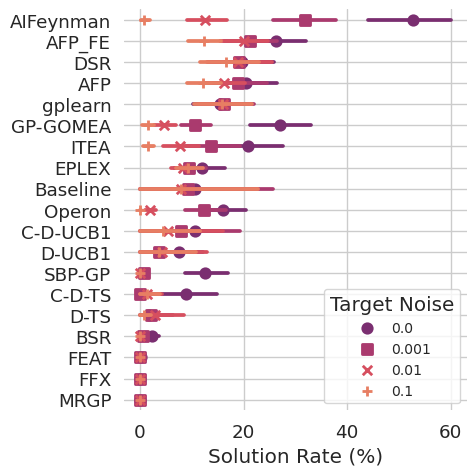

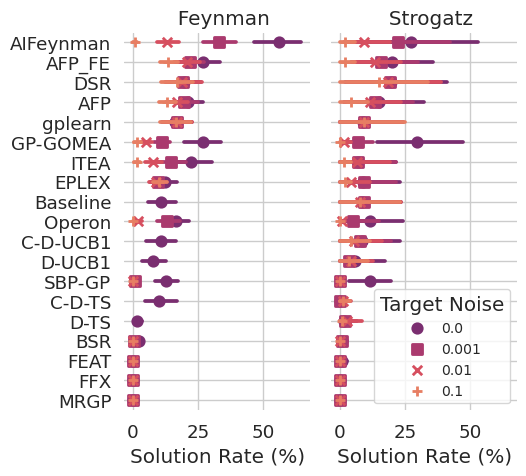

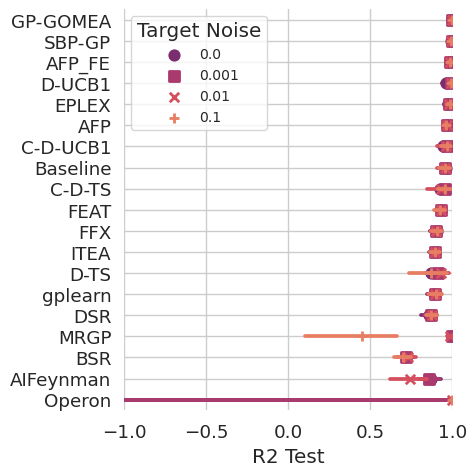

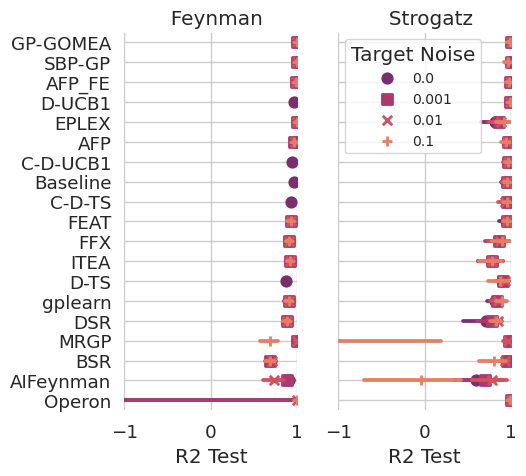

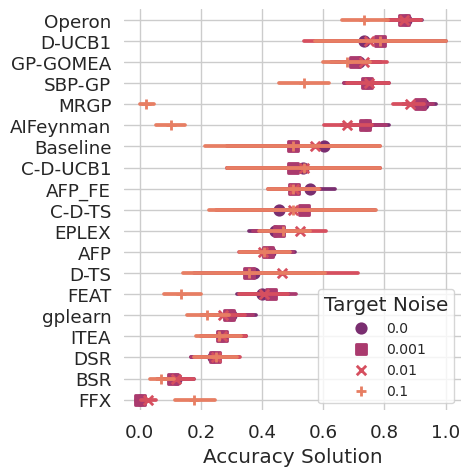

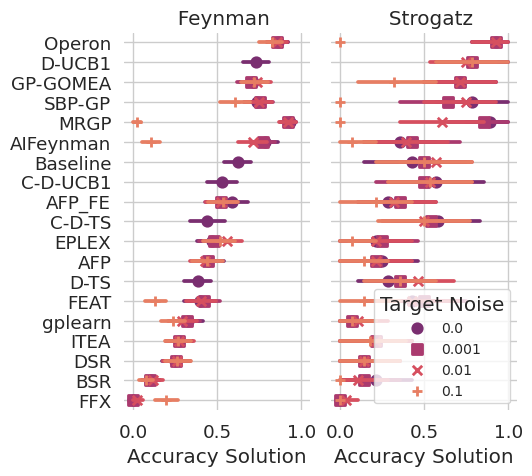

In [13]:
for metric in ['symbolic_solution_rate_(%)','r2_test','accuracy_solution']:
# for metric in ['r2_test']:
    for kind in ['point']: #,'strip']:
        args =dict(df_compare=df_sum, x=metric, est=np.mean, orient='h',
                   kind=kind) 
        if kind=='point': 
            args['join'] = False 
            args['markers']=['o','s','x','+']
        if metric == 'r2_test':
            args['xlim'] = [-1, 1]
        compare(**args,
                hue='target_noise', 
                col=None,
                ) 
        compare(**args, 
                hue='target_noise', 
                col='data_group',
                ) 

/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.2980392156862745, 0.4470588235294118, 0.6901960784313725)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.7686274509803922, 0.3058823529411765, 0.3215686274509804)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/ch246537/.conda/envs/srbench-brush/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.2980392156862745, 0.4470588235294118, 0.6901960784313725)) for an unfilled marker ('x').  M

saving pairgrid_symbolic_solution_rate_(pct)_r2_test_simplified_complexity.pdf


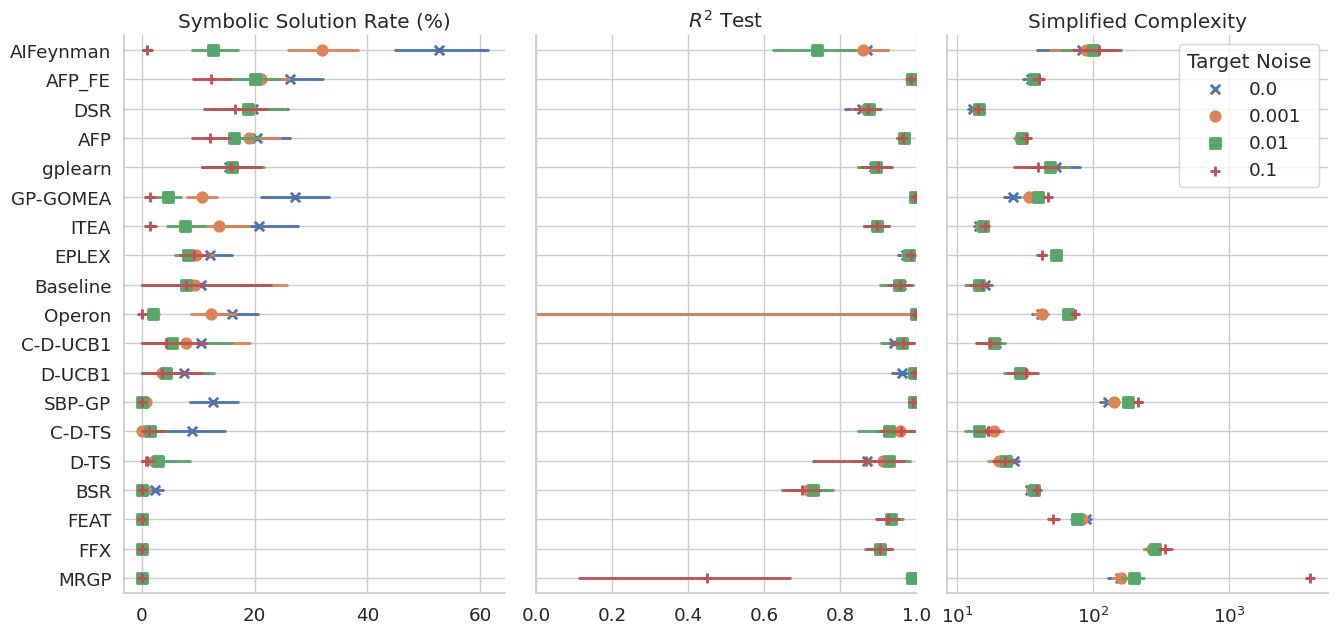

In [14]:
# Make the PairGrid
df_plot = df_sum.copy()
tmp = df_plot.groupby(['target_noise','algorithm'])['symbolic_solution_rate'].mean().unstack().mean()
order = tmp.sort_values(ascending=False).index
df_plot['size_diff'] = df_plot['model_size']-df_plot['simplified_complexity']+1
x_vars=[
#         'accuracy_solution_rate_(%)',
#         'mse_test',
#         'r2_test_rank',
#         'r2_test_norm',
        'symbolic_solution_rate_(%)',
        'r2_test',
        'simplified_complexity',
#         'size_diff',
#         'model_size',
#         'training time (s)',
#         'solution'
]
g = sns.PairGrid(df_plot, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.7,
                 hue='target_noise',
#                  hue_order=[0.01,0.001,0]
#                  hue='dataset'
                )
g.map(sns.pointplot, 
#       size=10,
      orient="h",
      # jitter=False,
      order=order,
      palette="flare_r",
      errwidth=2,
      # linewidth=0.01,
      # markeredgecolor='w',
      join=False,
      estimator=np.mean,
      n_boot=1000,
      markers=['x','o','s','+'],
      # markeralpha=0.5
     )
plt.legend(title='Target Noise')
titles = [x.replace('_',' ').title().replace('(S)','(s)') for x in x_vars]

for ax, title in zip(g.axes.flat, titles):

    # remove xlabel
    ax.set_xlabel('')
    ax.set_ylabel('')
    # Set a different title for each axes
    ax.set(title=title)
    
    if any([n in title.lower() for n in ['size','complexity','time']]):
        ax.set_xscale('log')
    if 'R2' in title and 'Rank' not in title:
        ax.set(title=title.replace('R2','$R^2$'))
        ax.set_xlim([0,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)
save(g, 'pairgrid_'+'_'.join(x_vars))